<a href="https://colab.research.google.com/github/Venkats-AI-codes/AI_practices/blob/main/zscore_and_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''outliers'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

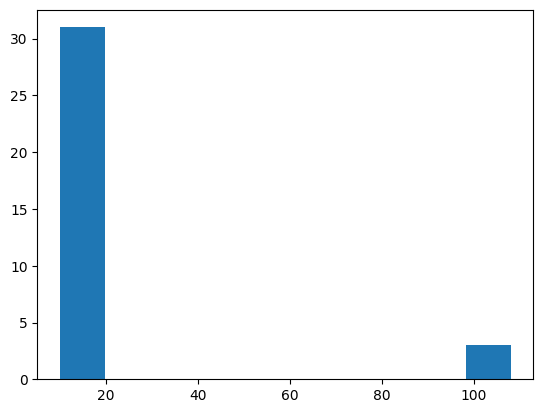

In [2]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]
plt.hist(dataset)

After 3rd Standard deviation the data present are outliers from the above graph more than 100 we have 3values which are outliers

In [4]:
outliers = []
def detect_outliers(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers

detect_outliers(dataset)

[102, 107, 108]

IQR(Inter quartile range)
1. sort the data
2. calculate percentile of Q1 and Q3
3. IQR = Q3 - Q1
4. find the lower fence(Q1-1.5*IQR)
5. find the upper fence(Q3+1.5*IQR)

In [5]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [7]:
Q1, Q3 = np.percentile(dataset, [25, 75])
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)

12.0 15.0
3.0


Find the lower and upper fence

In [8]:
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
print(lower_fence, upper_fence)

7.5 19.5


Another way to find lower and upperfence using graph

<Axes: >

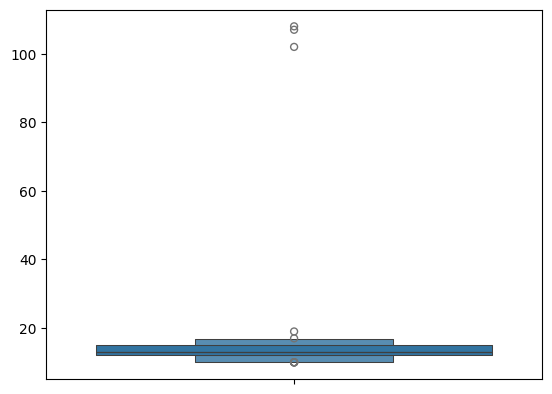

In [9]:
import seaborn as sns
sns.boxenplot(dataset)

Remove the outliers from the dataset

In [10]:
dataset = [x for x in dataset if x>lower_fence and x<upper_fence]
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]